## Business Understanding

### Overview

A car hire business also refered to as a car rental business provides vehicles for short-term use, usually ranging from a few hours to several days or weeks, to customers who require temporary transportation. This business is necessary in catering to individuals or businesses who do not own a car, those who need an extra vehicle for travel, or people who require specific types of vehicles for particular occasions. Car hire businesses are often part of the larger transportation and travel industries, serving both local and international customers. The car hire business operates by renting out a fleet of vehicles, often located at various rental locations, such as airports, train stations, or urban centers. These businesses offer a variety of vehicles ranging from economy cars to luxury cars, SUVs, vans, and trucks depending on customer demand. Some companies may also specialize in niche markets like luxury car rentals, wedding cars, or electric vehicle rentals.

### Business Problem

V magic Limited company now sees all the big companies diversifying to car rental business and they want to get in on the fun. They have to decide which cars to purchase depending on make, model, fuel consumption, emissions etc. I am charged with exploring what model and make of cars that are currently doing the best at the car rental industry. I must then translate those findings into actionable insights that the head of the company's car rental session can use to help him decide what type of make and model of cars to purchase. 

### Objectives

 1.	Analyze vehicle performance across different makes and models, through assesment of the fuel efficiency, emissions, and other performance metrics (such as engine size, number of cylinders, and transmission type) for various vehicle makes and models..

 2. Indentify the most popular vehicle classes for car rental business by examining the relationship between vehicle class (e.g., compact, mid-size, subcompact) and rental market demand. Consider which classes are likely to appeal to different customer segments (business travelers, tourists, local renters).

 3. Evaluate the cost and environmental impact of potential fleet vehicles Using the datasets on fuel consumption and emissions to calculate the long-term operational costs and environmental impact of various makes and models.
 
 4. Perform a comparative analysis of vehicle makes and models.

 5. Assess vehicle longevity and maintenance costs by analysis of vehicle engine size, transmission type, and fuel consumption data to predict potential long-term maintenance costs and vehicle longevity for each make and model.







## Data Understanding

### Data Source
For this project, we are working with a dataset that was sourced from [Kaggle](https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption), the dataset contains information on a variety of vehicles, focusing on attributes such as make, model, vehicle class, engine size, fuel consumption, emissions, and other key features that are relevant for analyzing the performance and suitability of cars for a car hire business.

### Data Description
The dataset includes the following key attributes:

1. Year: The model year of the vehicle.
2. Make: The manufacturer or brand of the vehicle. 
3. Model: The specific model of the vehicle. 
4. Vehicle Class: The category or class of the vehicle.
5. Engine Size: The size of the engine in liters.
6. Cylinders: The number of cylinders in the engine.
7. Transmission: The type of transmissiontic.
8. Fuel: The type of fuel used by the vehicle.
9. Fuel Consumption: The fuel consumption in liters per 100 kilometers.
10. Highway Fuel Consumption (HWY): Fuel consumption on the highway in liters per 100 kilometers.
11. Combined Fuel Consumption (COMB): The combined fuel consumption (city + highway) in liters per 100 kilometers.
12. Combined Fuel Economy (COMB MPG): The combined fuel economy in miles per gallon.
13. Emissions: The CO2 emissions of the vehicle in grams per kilometer.

## Data Preparation

### Importing libraries and reading the dataset

In [ ]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# reading the dataset and printing the first 5 rows
df = pd.read_csv("Fuel_Consumption_2000_2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [242]:
df.shape
type(df)
df.columns

print(f"The shape of the dataset is {df.shape}")
print(f"\nThe type of the dataset is {type(df)}")
print(f"\nThe dataset columns are {df.columns}")

The shape of the dataset is (22556, 13)

The type of the dataset is <class 'pandas.core.frame.DataFrame'>

The dataset columns are Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')


In [ ]:
# Title-case column names and then assign it back to df.columns
df.columns = df.columns.str.title()
# Preview
print(f"The dataset columns after title-case are {df.columns}")

The dataset columns after title-case are Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions'],
      dtype='object')


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              22556 non-null  int64  
 1   Make              22556 non-null  object 
 2   Model             22556 non-null  object 
 3   Vehicle Class     22556 non-null  object 
 4   Engine Size       22556 non-null  float64
 5   Cylinders         22556 non-null  int64  
 6   Transmission      22556 non-null  object 
 7   Fuel              22556 non-null  object 
 8   Fuel Consumption  22556 non-null  float64
 9   Hwy (L/100 Km)    22556 non-null  float64
 10  Comb (L/100 Km)   22556 non-null  float64
 11  Comb (Mpg)        22556 non-null  int64  
 12  Emissions         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


## Exploratory Data Analysis

### Data Cleaning, Identifying and handling issues in the dataset that is:

1. Checking for missing values, Filling or removing missing data.
2. Cheking for duplicate records, Identifying and removing duplicate rows.
3. Performing Univariate Analysis and Bivariate
4. Checking and Removing outliers


In [ ]:
# checking for any missing values
df.isna().sum() # our dataset has no missing values


Year                0
Make                0
Model               0
Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel                0
Fuel Consumption    0
Hwy (L/100 Km)      0
Comb (L/100 Km)     0
Comb (Mpg)          0
Emissions           0
dtype: int64

In [246]:
# checking for duplicates
df.duplicated().sum() # we have one duplicated row

1

In [ ]:
# dropping the duplicated row and previewing
df.drop_duplicates(keep='first', inplace=True)
# Preview
print("DataFrame after dropping duplicates:")
print(df.duplicated().sum())

DataFrame after dropping duplicates:
0


# Univariante Analysis

In [ ]:
# checking for the statistical distrution of numerical columins
df.describe()

,Year,Engine Size,Cylinders,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
count,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000
mean,2011.554955,3.356617,5.854046,12.763294,8.918958,11.034148,27.374950,250.063844
std,6.297939,1.335448,1.819582,3.500922,2.274675,2.910839,7.376881,59.352558
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.700000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [249]:
# defining our numerical columns
numerical_col = ["Engine Size", "Cylinders", "Fuel Consumption", "Hwy (L/100 Km)", "Comb (L/100 Km)", "Comb (Mpg)", "Emissions"]

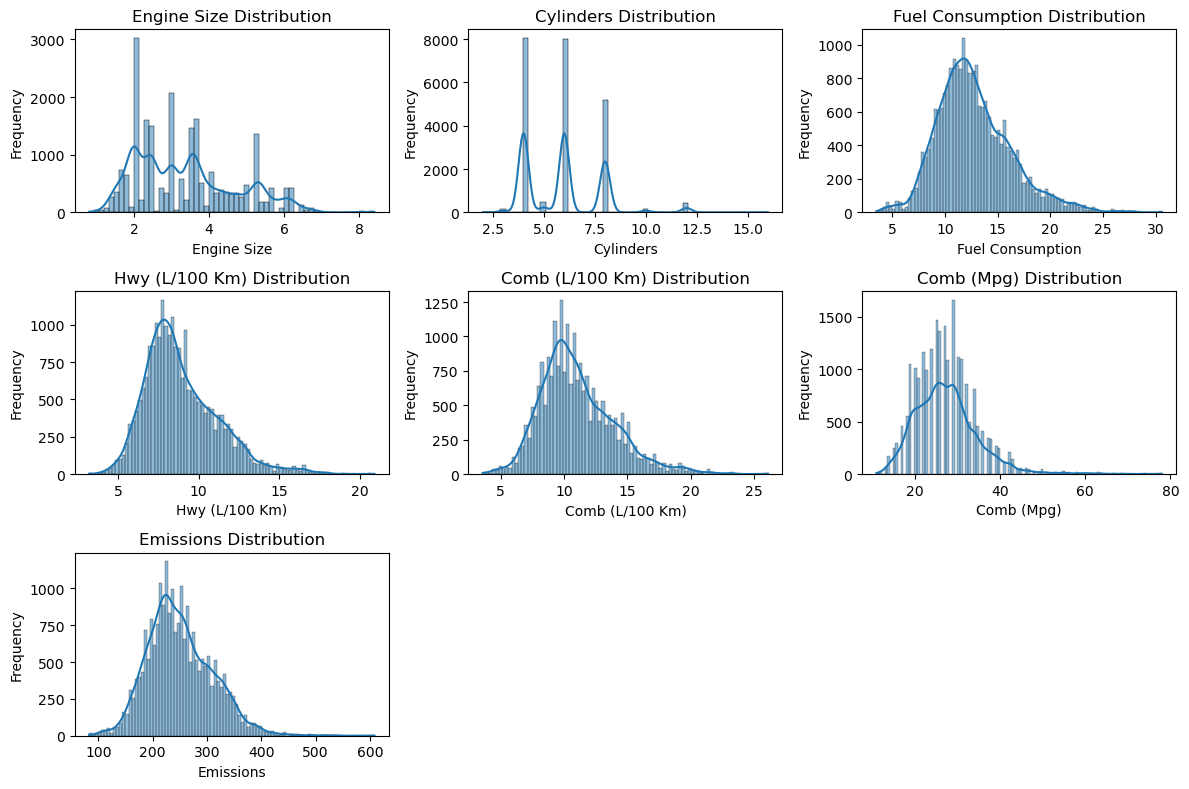

In [ ]:
# Plot histograms for all the numerical columns
plt.figure(figsize=(12, 8))

# Creating histograms for each numerical column
for i, col in enumerate(numerical_col):
    plt.subplot(3, 3, i+1)  # Use 3x3 grid to fit the 7 plots
    sns.histplot(df[col], kde=True)  # KDE add a smooth line over the histogram
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Calculating the IQR for each numerical variable
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using IQR method
outliers = ((df[numerical_col] < (Q1 - 1.5 * IQR)) | (df[numerical_col] > (Q3 + 1.5 * IQR)))
outliers_sum = outliers.sum()

# Output the number of outliers for each column
print(outliers_sum)


Engine Size          41
Cylinders            12
Fuel Consumption    552
Hwy (L/100 Km)      509
Comb (L/100 Km)     548
Comb (Mpg)          495
Emissions           218
dtype: int64


In [ ]:
# Defining the IQR bounds for each column
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Creating a filter so as to keep only the rows that are not outliers
# This checks if each value is within the IQR range for all columns in numerical_col
df1 = df[~((df[numerical_col] < (Q1 - 1.5 * IQR)) | (df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Displaying the shape of the new dataset to see how many rows were removed
print("Original dataset shape:", df.shape)
print("New dataset shape after removing outliers:", df1.shape)


Original dataset shape: (22555, 13)
New dataset shape after removing outliers: (21376, 13)


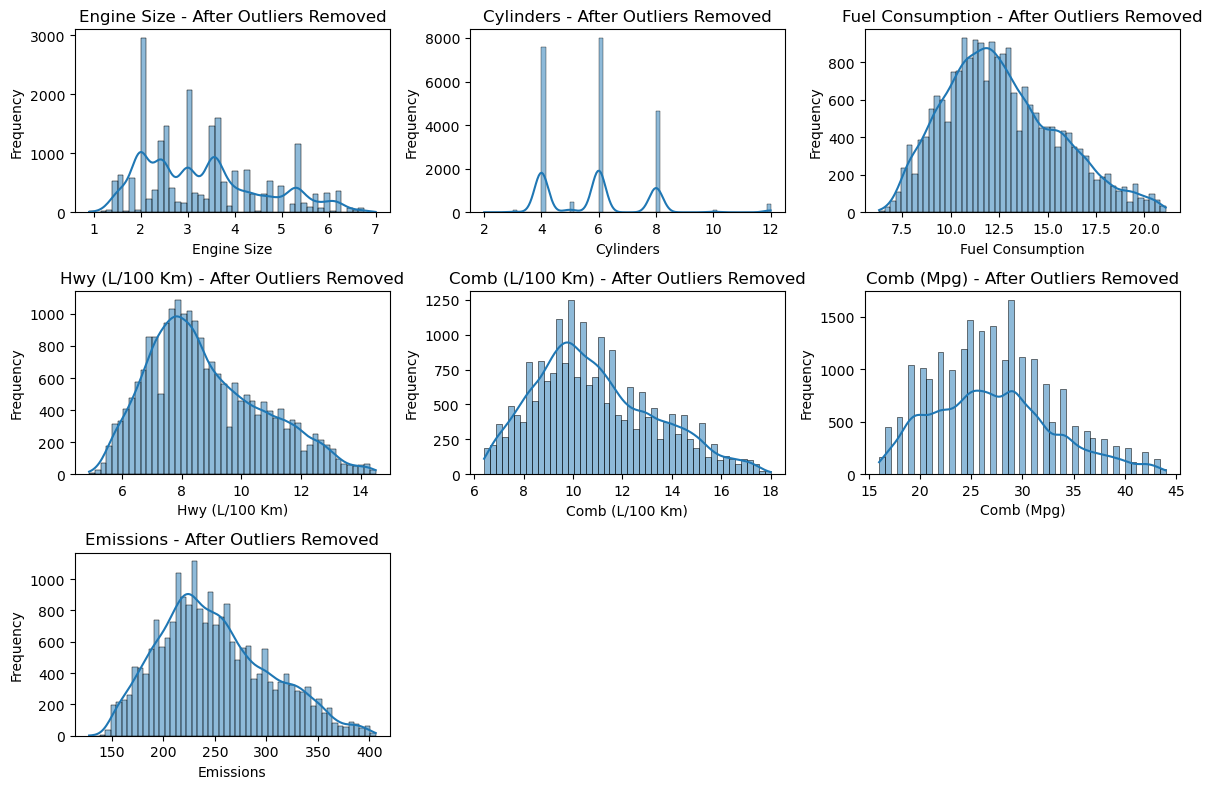

In [ ]:
# Ploting histograms for all numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_col):
    # Ploting the histogram for the column in the dataframe after removing outliers
    plt.subplot(3, 3, i+1)  # Second row  after-outlier plots
    sns.histplot(df1[col], kde=True)S# Add KDE for a smooth curve
    plt.title(f'{col} - After Outliers Removed')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjusting the layout to avoid overlap
plt.tight_layout()
plt.show()

This graph above shows the univariate distributions of key vehicle features after outlier removal, with each histogram overlaid by a (Kernel Density Estimation) KDE line for smoother visualization. The KDE lines closely fit the histograms, indicating that each feature follows expected distributions without distortion from extreme values.

1. Engine Size: Peaks around 2-3 liters, with fewer large engines, showing typical values without extreme skew.
2. Cylinders: Multimodal distribution, peaking at 4, 6, and 8 cylinders—common configurations in vehicles.
3. Fuel Consumption: Slight right skew, with most vehicles around 10-12 L/100 km, indicating moderate fuel efficiency.
4. Fuel Efficiency (L/100 km, MPG): L/100 km is right-skewed, MPG is left-skewed, both indicating a typical efficiency range.
5. Emissions: Roughly normal, centered around 250-300, focusing on typical values without outliers.
6. KDE Fit: In most cases, KDE lines closely match histogram bars, suggesting well-distributed data patterns without extreme outlier influence. 

In [ ]:
# List of columns for which to print value counts
columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel']

# Loop through each column then print value counts
for column in columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts())



Value counts for 'Make':
Make
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: count, Length: 87, dtype: int64

Value counts for 'Model':
Model
JETTA          89
MUSTANG        88
RANGER         61
SENTRA         58
ALTIMA         57
               ..
Optima FE       1
ARNAGE RL       1
BROOKLANDS      1
335d SEDAN      1
XC60 B6 AWD     1
Name: count, Length: 4242, dtype: int64

Value counts for 'Vehicle Class':
Vehicle Class
SUV                         2639
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-si

#### We drop Vehicle class with a popularity of less than 100

In [256]:
# Step 1: Identify categories with less than 100 occurrences
counts = df1['Vehicle Class'].value_counts()
categories_to_drop = counts[counts < 100].index

# Step 2: Filter the DataFrame to keep only rows with categories that have 100 or more occurrences
df2 = df1[~df['Vehicle Class'].isin(categories_to_drop)]

# Check the new shape to confirm rows were removed
print("Original shape:", df1.shape)
print("New shape after filtering:", df2.shape)


Original shape: (21376, 13)
New shape after filtering: (21169, 13)


In [259]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21169 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              21169 non-null  int64  
 1   Make              21169 non-null  object 
 2   Model             21169 non-null  object 
 3   Vehicle Class     21169 non-null  object 
 4   Engine Size       21169 non-null  float64
 5   Cylinders         21169 non-null  int64  
 6   Transmission      21169 non-null  object 
 7   Fuel              21169 non-null  object 
 8   Fuel Consumption  21169 non-null  float64
 9   Hwy (L/100 Km)    21169 non-null  float64
 10  Comb (L/100 Km)   21169 non-null  float64
 11  Comb (Mpg)        21169 non-null  int64  
 12  Emissions         21169 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.3+ MB


### Bivariate Analysis

####
It is a Statistical analysis that explores the relationship that exist between two variables. Correlation coefficient is one  of the main techniques that is used in bivariate analysis to understand the relationship between two variables. 

<Axes: >

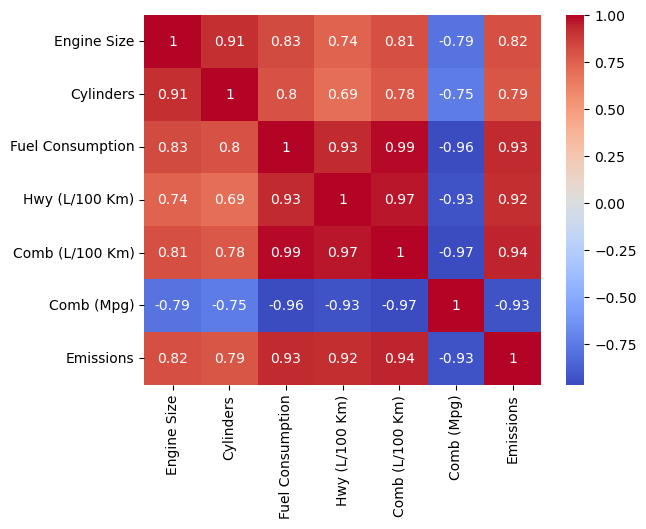

In [262]:
correlation_matrix = df2[['Engine Size', 'Cylinders', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#### The above diagram shows the correlation coefficient between varies variables. The close the value to +1 or -1 the greater the association. For instance: 

1. Fuel Consumption and Comb (L/100 Km) has a correlation coefficient of +0.99 meaning it is a strong positive correlation. Fuel consumption and combined fuel consumption (Comb L/100 Km) are almost perfectly positively correlated

2. Comb (MPG) and Comb (L/100 Km) has a Correlation Coefficient: -0.97 a strong negative correlation. Combined miles per gallon (MPG) and combined liters per 100 km (L/100 Km) have a strong negative correlation. 

## Modelling

### Data Visualization

Analyze vehicle performance across different makes and models

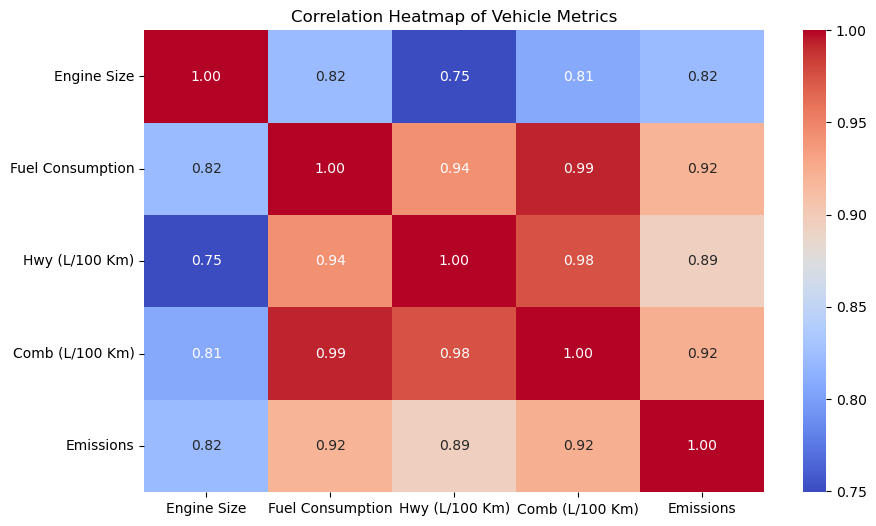

In [281]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['Engine Size', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)', 'Emissions']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Vehicle Metrics')
plt.show()




### Identify the most popular vehicle classes for car rental

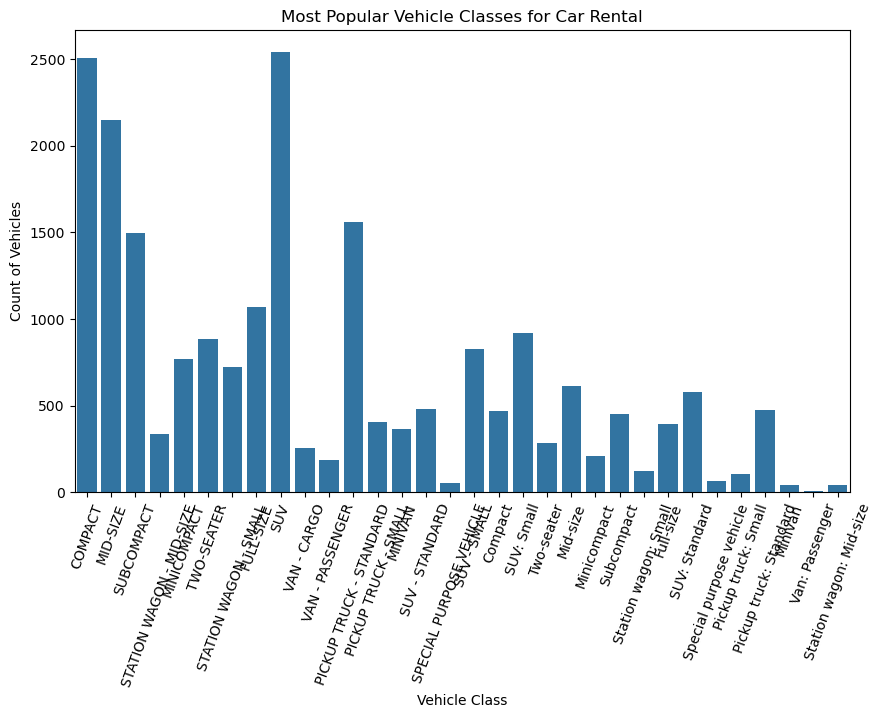

In [285]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Class', data=df1)
plt.title('Most Popular Vehicle Classes for Car Rental')
plt.xlabel('Vehicle Class')
plt.ylabel('Count of Vehicles')
plt.xticks(rotation=70)
plt.show()


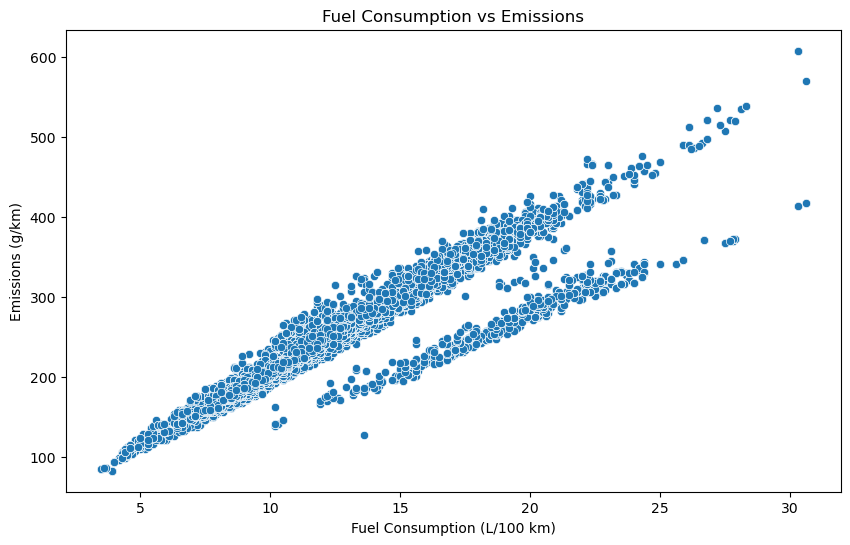

In [286]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel Consumption', y='Emissions', data=df, palette='coolwarm')
plt.title('Fuel Consumption vs Emissions')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Emissions (g/km)')
plt.show()


#### Perform a comparative analysis of vehicle makes and models

Visualize the average Fuel Consumption across different Makes of vehicles.

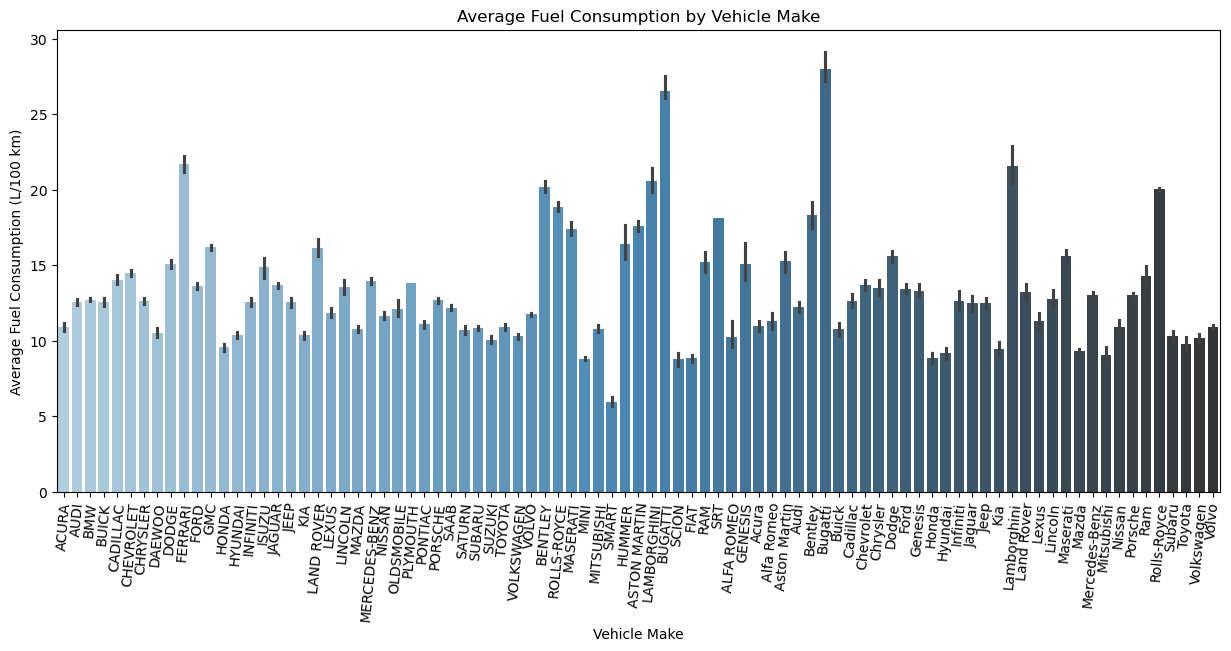

In [290]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Make', y='Fuel Consumption', data=df, palette='Blues_d')
plt.title('Average Fuel Consumption by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.xticks(rotation=85)
plt.show()


Assess vehicle longevity and maintenance costs
Visualize the relationship between Engine Size and Fuel Consumption to assess potential long-term maintenance costs for vehicles with larger engines

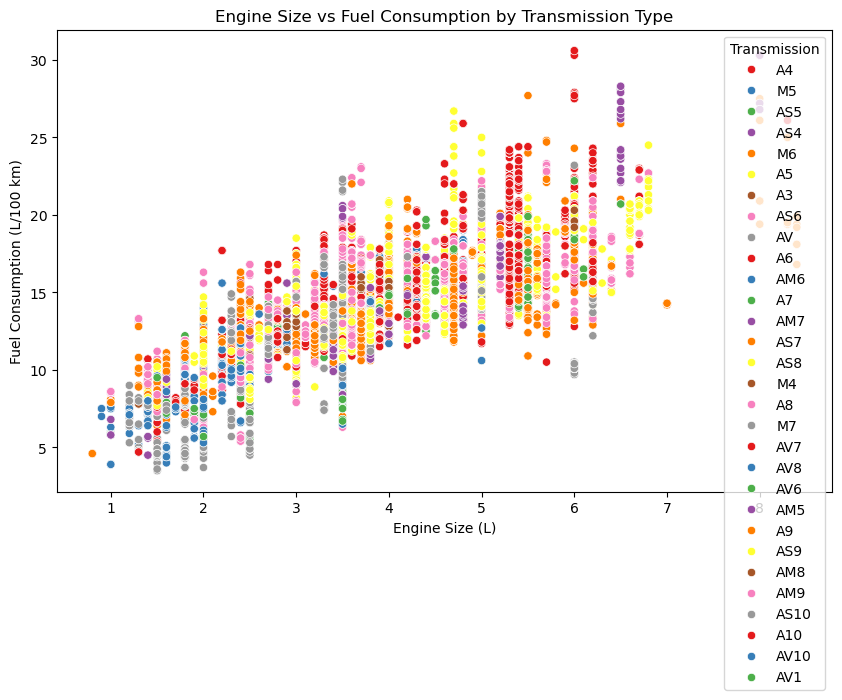

In [291]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size', y='Fuel Consumption', hue='Transmission', data=df, palette='Set1')
plt.title('Engine Size vs Fuel Consumption by Transmission Type')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()
